In [1]:
import anndata
import numpy as np
import pandas as pd
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/Lee2019/scHiC.h5ad")

# hic.X = np.round(np.log1p(hic.X), 0)
# _max = hic.X.max(axis=1)
# hic.X = np.round((1/_max).reshape((1/_max).shape[0],1) * hic.X * 255, 0)

# hic.X = hic.X.argsort()
# _max = hic.X.max(axis=1)
# hic.X = np.round((1/_max).reshape((1/_max).shape[0],1) * hic.X * 255, 0)

hic

AnnData object with n_obs × n_vars = 4238 × 309581
    obs: 'domain'
    var: 'chrom', 'start'

In [4]:
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC_10kb_contacts.cool,scHiC
181218_21yr_2_B11_AD002_Vip_10kb_contacts.cool,scHiC
190315_29yr_4_A3_AD006_L5_10kb_contacts.cool,scHiC
190315_21yr_6_F11_AD012_L23_10kb_contacts.cool,scHiC
181218_21yr_2_G12_AD010_MP_10kb_contacts.cool,scHiC
...,...
190305_21yr_2_H6_AD007_MP_10kb_contacts.cool,scHiC
190305_21yr_2_B1_AD001_OPC_10kb_contacts.cool,scHiC
190315_21yr_4_C7_AD010_Vip_10kb_contacts.cool,scHiC


In [5]:
hic.obs_names = hic.obs_names.str.split(r"[:_]").map(lambda x: '_'.join(x[:-2]))
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC,scHiC
181218_21yr_2_B11_AD002_Vip,scHiC
190315_29yr_4_A3_AD006_L5,scHiC
190315_21yr_6_F11_AD012_L23,scHiC
181218_21yr_2_G12_AD010_MP,scHiC
...,...
190305_21yr_2_H6_AD007_MP,scHiC
190305_21yr_2_B1_AD001_OPC,scHiC
190315_21yr_4_C7_AD010_Vip,scHiC


In [6]:
hic_pca = pd.read_csv('/home/micl/workspace/lmh_data/Lee2019/BandNorm/embedding.txt', sep='\t')
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
181218_21yr_2_A1_AD002_L23.txt,890.902763,83.059109,10.409427,3.083012,-49.354259,-32.600687,14.483734,-18.205280,-41.147020,26.329468,...,-75.735664,-3.820232,36.103463,-27.970191,42.335609,-3.901578,82.587591,-25.758200,-22.978127,96.463360
181218_21yr_2_A1_AD004_L23.txt,904.872698,118.306720,-19.466440,-60.319205,-21.003638,18.145742,13.801854,47.763996,-68.598821,-5.905531,...,49.290660,-67.283106,63.113846,-103.293280,326.277678,169.548997,2.469605,53.261816,-125.220526,152.974825
181218_21yr_2_A1_AD006_L6.txt,919.593825,161.310310,-32.728456,-73.150546,-40.742312,-20.245419,7.219258,23.709505,-42.157936,31.101920,...,-115.939807,134.374472,-152.814060,99.921896,-232.474914,98.563518,-60.032190,-6.316850,-56.298253,279.926732
181218_21yr_2_A1_AD008_ODC.txt,847.266348,-202.626888,68.867497,3.661814,9.588173,18.015434,2.675589,-2.031951,-41.755522,-14.324155,...,-2.210585,-21.356662,31.221962,1.551080,10.824116,-24.044750,12.866632,-16.734417,-11.687963,10.222472
181218_21yr_2_A1_AD010_L5.txt,886.009912,56.243458,10.304221,17.604349,-15.108784,12.878859,24.463045,24.169183,-40.195791,15.401737,...,34.124152,-22.576417,32.882791,18.596894,3.256004,-26.359388,11.476817,19.178504,29.270071,52.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190315_29yr_6_H9_AD004_ODC.txt,875.749342,-54.474977,62.063033,-3.718579,-26.856854,0.777472,4.115779,11.823778,5.298375,4.900289,...,-11.239674,2.795996,-4.207720,8.334254,-3.466066,3.272328,13.226099,-7.189493,-6.957192,2.088942
190315_29yr_6_H9_AD006_ODC.txt,869.931323,-76.770471,74.170357,-15.045151,-13.061829,20.001922,1.833363,11.767611,-9.040591,-5.036546,...,6.593132,8.693434,0.491497,-0.642918,0.887359,-0.908937,3.024385,-4.100478,7.214831,-5.355590
190315_29yr_6_H9_AD008_L4.txt,912.004776,184.210110,-38.544711,23.696057,-12.341722,20.049228,-4.100016,16.438967,-12.954493,-6.911907,...,-1.795838,1.604240,5.245884,-0.446017,9.135502,4.044941,-9.760894,2.112579,4.890044,0.847785
190315_29yr_6_H9_AD010_Astro.txt,894.382651,66.583788,10.889655,43.946956,85.647281,-63.064850,15.228112,-24.624083,-2.974911,31.133385,...,-4.625787,-19.812551,-10.425295,16.577477,0.681416,-6.781128,-5.698107,1.316502,-2.404099,2.969823


In [7]:
hic_pca.index = hic_pca.index.str.split(".").map(lambda x: x[0])
hic_pca = hic_pca.loc[hic.obs.index]
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
cells,,,,,,,,,,,,,,,,,,,,,
190315_29yr_6_E11_AD008_ODC,871.781631,-72.333254,63.865209,-14.608258,-34.432074,9.476109,12.062783,9.782404,-21.597138,2.173983,...,1.046651,-17.042478,14.882015,-16.534655,1.391168,1.037403,0.538673,5.050615,-3.346549,-9.387006
181218_21yr_2_B11_AD002_Vip,899.521570,45.921524,24.171058,-49.777993,26.439545,22.897166,-15.028630,-20.633081,86.418502,7.517671,...,-20.367953,-41.389145,-14.781687,19.157262,-76.522537,25.832940,-19.830331,-19.379901,23.400929,-20.666634
190315_29yr_4_A3_AD006_L5,910.927240,176.876999,-52.440313,0.090915,-12.977546,14.780844,-3.253028,4.845430,-17.316657,-3.052136,...,1.430656,4.287518,-0.204909,5.015617,-5.961964,5.474950,6.702222,-5.824094,1.618371,-8.200665
190315_21yr_6_F11_AD012_L23,895.118014,113.303367,-10.757518,3.634128,-11.863942,21.572154,-18.377858,24.537773,-18.833498,-17.442221,...,-1.133421,7.014512,-2.394452,2.158924,-4.890967,-3.362944,12.538875,0.422184,16.263263,-0.436824
181218_21yr_2_G12_AD010_MP,858.744546,-225.178006,-95.737815,-36.902689,-7.173654,-26.212862,11.680092,-34.620812,-11.160733,12.925413,...,-8.080701,-5.339622,-5.127203,-28.472476,6.222498,35.060980,20.667730,-1.552784,8.225492,13.769378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190305_21yr_2_H6_AD007_MP,857.498332,-149.184302,-83.695044,-22.429992,-20.709749,-15.070855,8.958101,-7.510331,-34.261582,-36.159327,...,0.125220,16.544760,-9.807549,3.689828,-10.374477,-15.048891,-11.979496,5.252029,11.125054,3.911368
190305_21yr_2_B1_AD001_OPC,881.475294,-40.585908,40.154314,33.735235,51.666098,30.628314,-20.095340,10.426129,61.817539,-21.341536,...,-4.706073,-13.534714,4.893264,4.469470,-5.452570,6.212225,-1.512326,-2.814021,1.630196,-16.041625
190315_21yr_4_C7_AD010_Vip,900.474789,108.554408,-17.448108,39.083229,8.888875,44.529691,-28.568607,46.364711,71.446270,-17.628988,...,20.495377,-65.501270,-10.201661,-11.963391,-48.053869,-2.880644,-39.451852,0.294456,57.935249,23.469849


In [8]:
hic.obs["cell_type"] = hic.obs_names.str.split(r"[:_]").map(lambda x: x[5])
hic.obsm["X_pca"] = hic_pca.to_numpy()

del hic_pca; import gc; gc.collect();

In [9]:
hic = hic[hic.obs['cell_type'].isin(['Astro', 'Endo', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']),:]
hic.obs

,domain,cell_type
cells,,
190315_29yr_6_E11_AD008_ODC,scHiC,ODC
181218_21yr_2_B11_AD002_Vip,scHiC,Vip
190305_21yr_2_B4_AD002_Vip,scHiC,Vip
190315_21yr_4_G1_AD012_Astro,scHiC,Astro
181218_21yr_2_G7_AD004_Astro,scHiC,Astro
...,...,...
181218_21yr_3_D5_AD010_Vip,scHiC,Vip
190315_21yr_6_G12_AD006_OPC,scHiC,OPC
190305_21yr_2_B1_AD001_OPC,scHiC,OPC


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


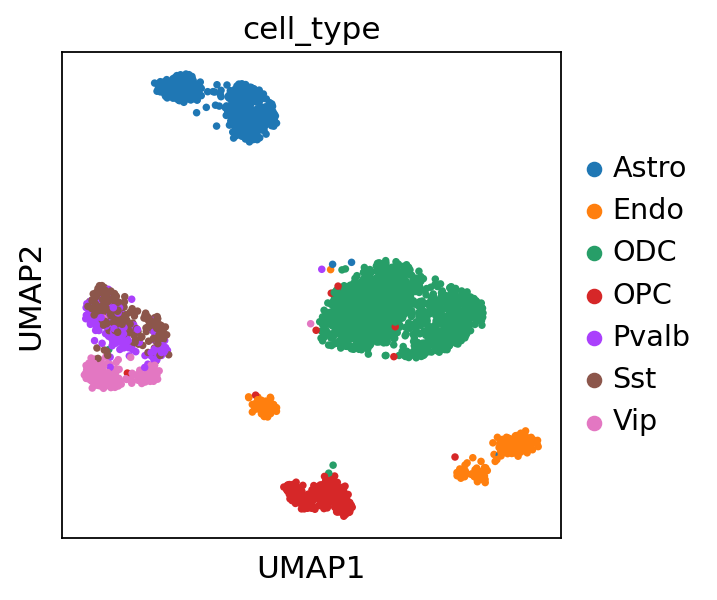

In [10]:
sc.pp.neighbors(hic, use_rep="X_pca", metric="cosine")
sc.tl.umap(hic)
sc.pl.umap(hic, color="cell_type")

In [11]:
rna = anndata.read_h5ad("/home/micl/workspace/lmh_data/Human_M1_10x/scRNA.h5ad")
rna.layers["counts"] = rna.X.copy()
rna

AnnData object with n_obs × n_vars = 22433 × 50281
    obs: 'cell_type', 'domain'
    layers: 'counts'

In [12]:
scglue.data.get_gene_annotation(
    rna, gtf="/home/micl/workspace/lmh_data/public/gencode.v19.annotation.gtf",
    gtf_by="gene_name"
)
rna = rna[:, rna.var.dropna(axis=0, how='all').index]
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
DDX11L1,chr1,11868.0,14412.0
WASH7P,chr1,14362.0,29806.0
MIR1302-2,chr9,27656.0,30891.0
FAM138A,chr1,34553.0,36081.0
OR4G4P,chr1,52472.0,54936.0


In [13]:
sc.pp.highly_variable_genes(rna, n_top_genes=1000, flavor="seurat_v3")
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


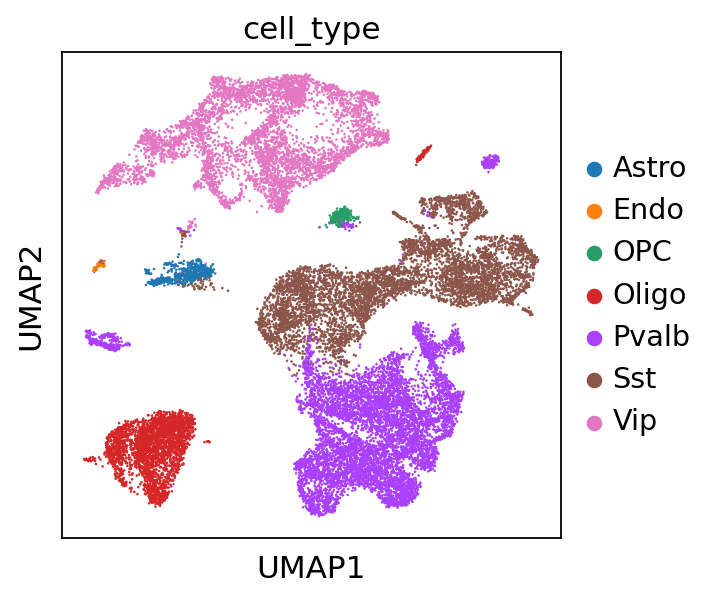

In [14]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

In [15]:
hic.var

,chrom,start
chr1_0,chr1,0
chr1_10000,chr1,10000
chr1_20000,chr1,20000
chr1_30000,chr1,30000
chr1_40000,chr1,40000
...,...,...
chrY_59330000,chrY,59330000
chrY_59340000,chrY,59340000
chrY_59350000,chrY,59350000
chrY_59360000,chrY,59360000


In [16]:
hic.var = hic.var.rename(columns={'start':'chromStart'})
hic.var['chromEnd'] = hic.var['chromStart'] + 10000
hic.var

,chrom,chromStart,chromEnd
chr1_0,chr1,0,10000
chr1_10000,chr1,10000,20000
chr1_20000,chr1,20000,30000
chr1_30000,chr1,30000,40000
chr1_40000,chr1,40000,50000
...,...,...,...
chrY_59330000,chrY,59330000,59340000
chrY_59340000,chrY,59340000,59350000
chrY_59350000,chrY,59350000,59360000
chrY_59360000,chrY,59360000,59370000


In [17]:
rna

AnnData object with n_obs × n_vars = 22433 × 29175
    obs: 'cell_type', 'domain'
    var: 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'transcript_id', 'gene_type', 'gene_status', 'transcript_type', 'transcript_status', 'transcript_name', 'havana_gene', 'tag', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

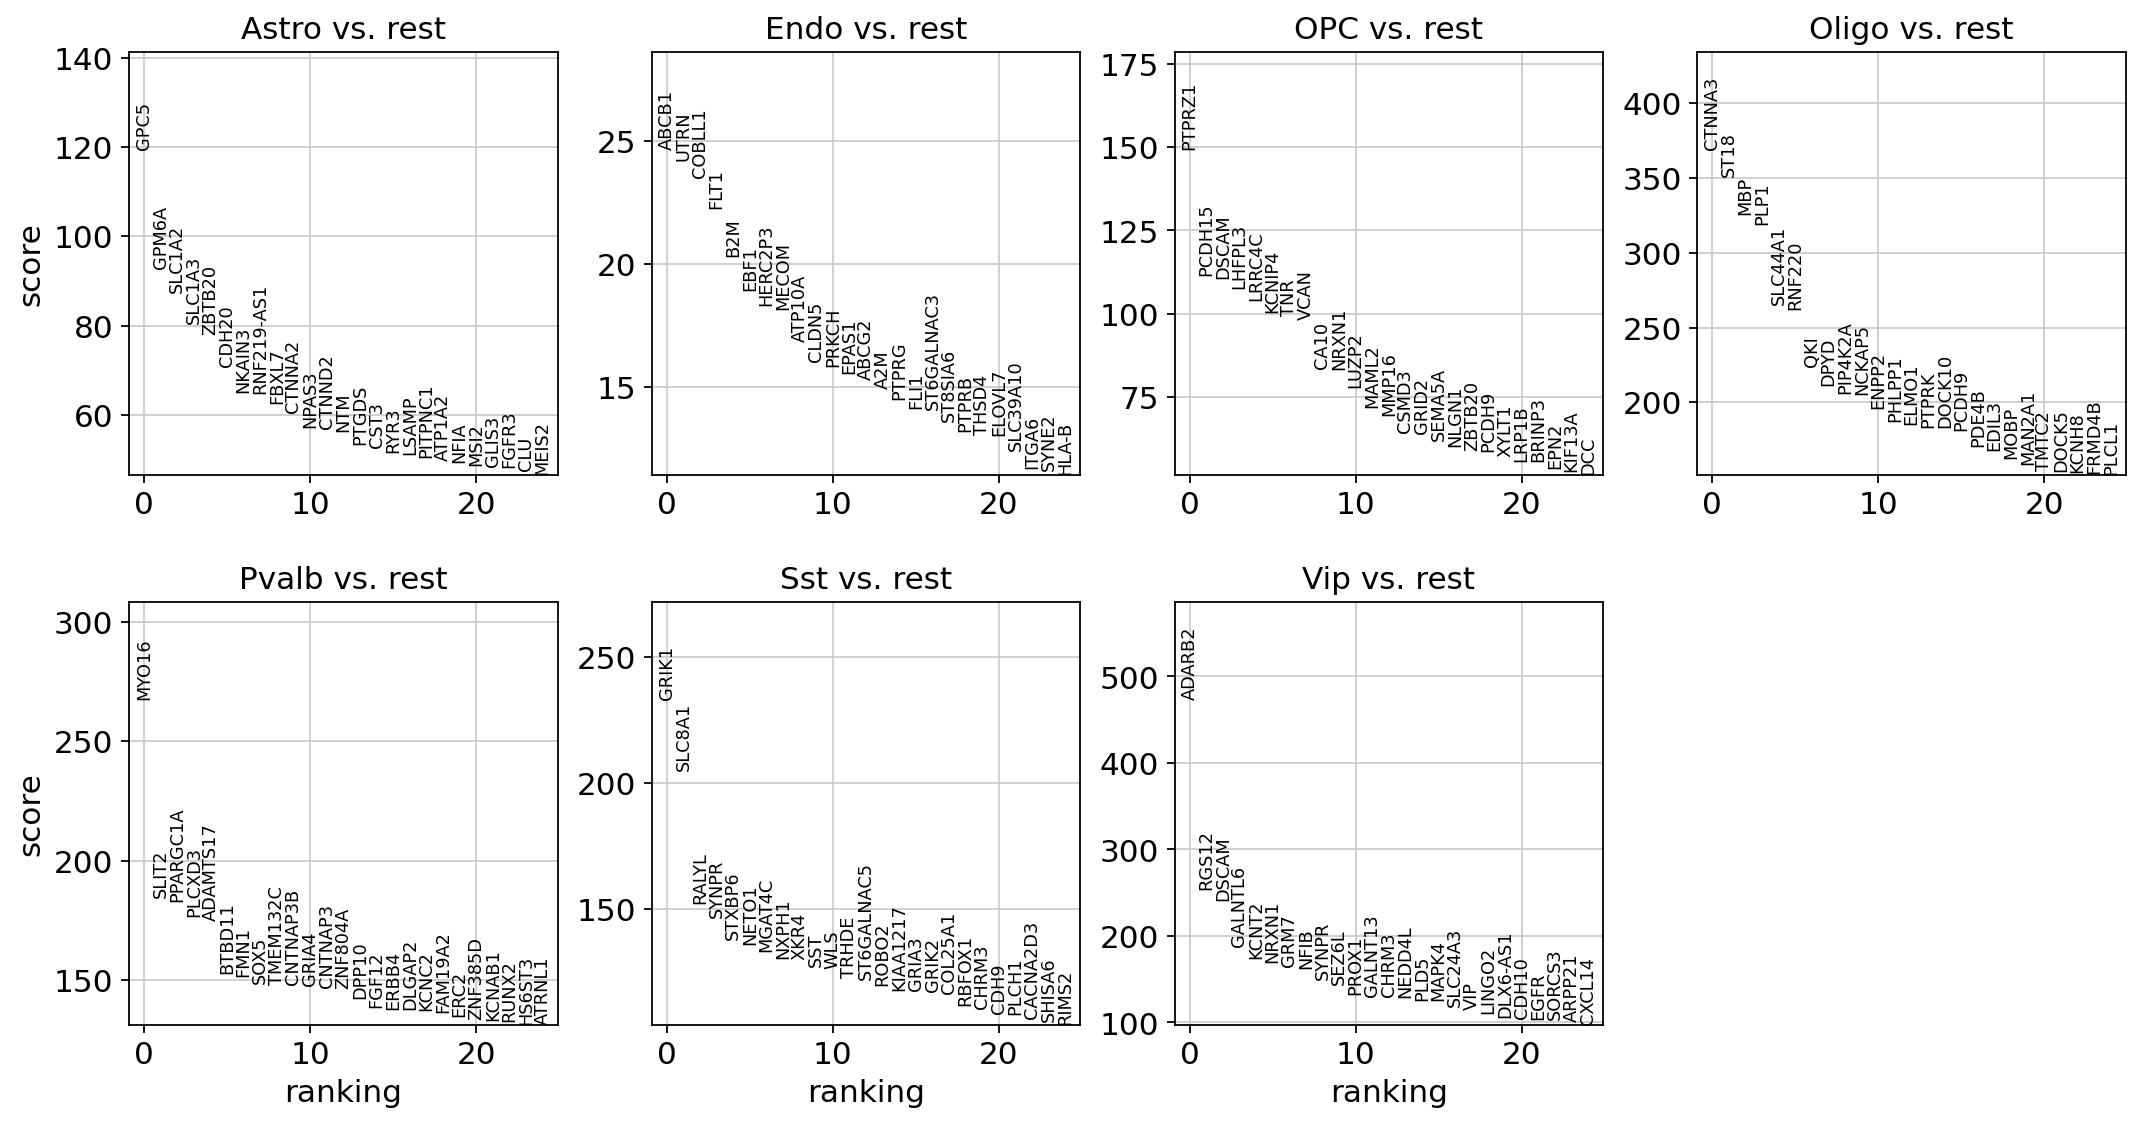

In [18]:
sc.tl.rank_genes_groups(rna, 'cell_type', method='t-test')
sc.pl.rank_genes_groups(rna, n_genes=25, sharey=False)

In [19]:
marker_genes = pd.DataFrame(rna.uns['rank_genes_groups']['names'])[:50]
marker_genes

,Astro,Endo,OPC,Oligo,Pvalb,Sst,Vip
0,GPC5,ABCB1,PTPRZ1,CTNNA3,MYO16,GRIK1,ADARB2
1,GPM6A,UTRN,PCDH15,ST18,SLIT2,SLC8A1,RGS12
2,SLC1A2,COBLL1,DSCAM,MBP,PPARGC1A,RALYL,DSCAM
3,SLC1A3,FLT1,LHFPL3,PLP1,PLCXD3,SYNPR,GALNTL6
4,ZBTB20,B2M,LRRC4C,SLC44A1,ADAMTS17,STXBP6,KCNT2
5,CDH20,EBF1,KCNIP4,RNF220,BTBD11,NETO1,NRXN1
6,NKAIN3,HERC2P3,TNR,QKI,FMN1,MGAT4C,GRM7
7,RNF219-AS1,MECOM,VCAN,DPYD,SOX5,NXPH1,NFIB
8,FBXL7,ATP10A,CA10,PIP4K2A,TMEM132C,XKR4,SYNPR
9,CTNNA2,CLDN5,NRXN1,NCKAP5,CNTNAP3B,SST,SEZ6L


In [20]:
marker_genes_index = marker_genes.values.reshape(-1)
rna.var['highly_variable'] = False
rna.var.loc[marker_genes_index, 'highly_variable'] = True
rna.var

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,transcript_name,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
DDX11L1,chr1,11868.0,14412.0,DDX11L1,.,+,.,.,.,.,...,DDX11L1,OTTHUMG00000000961.2,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
WASH7P,chr1,14362.0,29806.0,WASH7P,.,-,.,.,.,.,...,WASH7P,OTTHUMG00000000958.1,NaN,False,NaN,0.013284,0.013376,0.904079,0.00857,0.084148
MIR1302-2,chr9,27656.0,30891.0,MIR1302-2,.,+,.,.,.,.,...,MIR1302-2,OTTHUMG00000019418.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
FAM138A,chr1,34553.0,36081.0,FAM138A,.,-,.,.,.,.,...,FAM138A,OTTHUMG00000000960.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
OR4G4P,chr1,52472.0,54936.0,OR4G4P,.,+,.,.,.,.,...,OR4G4P,OTTHUMG00000185779.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPTE2P4,chrY,28654359.0,28725837.0,TPTE2P4,.,+,.,.,.,.,...,TPTE2P4,OTTHUMG00000036765.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
SLC25A15P1,chrY,28732788.0,28737748.0,SLC25A15P1,.,-,.,.,.,.,...,SLC25A15P1,OTTHUMG00000036811.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
PARP4P1,chrY,28740997.0,28780799.0,PARP4P1,.,-,.,.,.,.,...,PARP4P1,OTTHUMG00000036812.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000
FAM58CP,chrY,28772666.0,28773306.0,FAM58CP,.,-,.,.,.,.,...,FAM58CP,OTTHUMG00000036813.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000


In [21]:
rna.var.loc[marker_genes_index]

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,transcript_name,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
GPC5,chr13,92050928.0,93519490.0,GPC5,.,+,.,.,.,.,...,GPC5,OTTHUMG00000017200.1,ncRNA_host,True,4.0,4.714884,252.421291,10.906835,0.587376,1.121198
ABCB1,chr7,87133174.0,87342611.0,ABCB1,.,-,.,.,.,.,...,ABCB1,OTTHUMG00000023393.25,NaN,True,300.0,0.231044,0.754079,2.592546,0.114723,0.325677
PTPRZ1,chr7,121513142.0,121702090.0,PTPRZ1,.,+,.,.,.,.,...,PTPRZ1,OTTHUMG00000157057.1,NaN,True,337.0,1.703874,10.020053,2.488965,0.631920,0.825381
CTNNA3,chr10,67672275.0,69455927.0,CTNNA3,.,-,.,.,.,.,...,CTNNA3,OTTHUMG00000018334.7,ncRNA_host,True,66.0,3.385905,62.151668,4.873966,0.830738,1.328344
MYO16,chr13,109248499.0,109860355.0,MYO16,.,+,.,.,.,.,...,MYO16,OTTHUMG00000017333.3,NaN,True,333.0,5.478982,76.220058,2.501800,0.892748,1.082892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEB1,chr10,31607423.0,31818742.0,ZEB1,.,+,.,.,.,.,...,ZEB1,OTTHUMG00000017907.3,NaN,True,NaN,4.179958,16.680033,0.896621,1.258220,0.814381
CREB5,chr7,28338939.0,28865511.0,CREB5,.,+,.,.,.,.,...,CREB5,OTTHUMG00000097081.9,NaN,True,353.0,0.919404,3.960961,2.450582,0.478992,0.876365
CPLX1,chr4,778744.0,819986.0,CPLX1,.,-,.,.,.,.,...,CPLX1,OTTHUMG00000160005.1,NaN,True,919.0,1.912406,7.821009,1.617233,0.640160,0.634708
CDH8,chr16,61681145.0,62070939.0,CDH8,.,-,.,.,.,.,...,CDH8,OTTHUMG00000137493.6,ncRNA_host,True,303.0,3.087639,28.042694,2.588471,0.872962,1.055703


In [22]:
_test = rna.var.loc[marker_genes_index].copy()
_test['diag'] = _test['chromEnd'] - _test['chromStart']
_test[_test['diag']>=10000][:20]

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,diag
GPC5,chr13,92050928.0,93519490.0,GPC5,.,+,.,.,.,.,...,OTTHUMG00000017200.1,ncRNA_host,True,4.0,4.714884,252.421291,10.906835,0.587376,1.121198,1468562.0
ABCB1,chr7,87133174.0,87342611.0,ABCB1,.,-,.,.,.,.,...,OTTHUMG00000023393.25,NaN,True,300.0,0.231044,0.754079,2.592546,0.114723,0.325677,209437.0
PTPRZ1,chr7,121513142.0,121702090.0,PTPRZ1,.,+,.,.,.,.,...,OTTHUMG00000157057.1,NaN,True,337.0,1.703874,10.020053,2.488965,0.631920,0.825381,188948.0
CTNNA3,chr10,67672275.0,69455927.0,CTNNA3,.,-,.,.,.,.,...,OTTHUMG00000018334.7,ncRNA_host,True,66.0,3.385905,62.151668,4.873966,0.830738,1.328344,1783652.0
MYO16,chr13,109248499.0,109860355.0,MYO16,.,+,.,.,.,.,...,OTTHUMG00000017333.3,NaN,True,333.0,5.478982,76.220058,2.501800,0.892748,1.082892,611856.0
GRIK1,chr21,30909253.0,31312351.0,GRIK1,.,-,.,.,.,.,...,OTTHUMG00000078879.1,NaN,True,159.0,26.951277,2199.387471,3.297543,1.955305,1.822247,403098.0
ADARB2,chr10,1228072.0,1779670.0,ADARB2,.,-,.,.,.,.,...,OTTHUMG00000017543.1,NaN,True,55.0,12.376365,749.696743,5.275010,1.090137,1.647322,551598.0
GPM6A,chr4,176554084.0,176923815.0,GPM6A,.,-,.,.,.,.,...,OTTHUMG00000160760.4,NaN,True,NaN,9.383230,74.741368,0.895609,1.963929,1.005008,369731.0
UTRN,chr6,144606836.0,145174170.0,UTRN,.,+,.,.,.,.,...,OTTHUMG00000015746.4,NaN,True,307.0,2.467570,19.004220,2.580383,0.701380,0.865256,567334.0
PCDH15,chr10,55562530.0,57387702.0,PCDH15,.,-,.,.,.,.,...,OTTHUMG00000018259.8,ncRNA_host,True,177.0,3.850889,51.584889,3.214097,0.858128,1.066858,1825172.0


In [23]:
_test = rna.var.loc[marker_genes_index].copy()
_test['diag'] = _test['chromEnd'] - _test['chromStart']
_test[_test['diag']>=10000].sort_values('highly_variable_rank')[:20]

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,diag
GPC5,chr13,92050928.0,93519490.0,GPC5,.,+,.,.,.,.,...,OTTHUMG00000017200.1,ncRNA_host,True,4.0,4.714884,252.421291,10.906835,0.587376,1.121198,1468562.0
LINC00299,chr2,8147900.0,8523751.0,LINC00299,.,-,.,.,.,.,...,OTTHUMG00000112455.5,NaN,True,12.0,0.352962,3.726785,7.814678,0.133097,0.516342,375851.0
RNF219-AS1,chr13,78493823.0,79191463.0,RNF219-AS1,.,+,.,.,.,.,...,OTTHUMG00000185746.4,NaN,True,14.0,0.226675,2.191706,7.699782,0.100454,0.511447,697640.0
ST18,chr8,53023398.0,53373519.0,ST18,.,-,.,.,.,.,...,OTTHUMG00000164233.2,NaN,True,15.0,2.807917,70.203072,7.644785,0.573452,1.358985,350121.0
SLC1A2,chr11,35272752.0,35441610.0,SLC1A2,.,-,.,.,.,.,...,OTTHUMG00000044391.4,NaN,True,18.0,1.811528,32.503617,7.329569,0.601891,0.877691,168858.0
CA10,chr17,49707673.0,50237377.0,CA10,.,-,.,.,.,.,...,OTTHUMG00000177544.2,NaN,True,23.0,0.389293,3.812202,7.115809,0.135435,0.511103,529704.0
MOBP,chr3,39508688.0,39570970.0,MOBP,.,+,.,.,.,.,...,OTTHUMG00000131347.9,NaN,True,29.0,1.130923,14.995653,6.916591,0.404195,1.026400,62282.0
PLP1,chrX,103028646.0,103047548.0,PLP1,.,+,.,.,.,.,...,OTTHUMG00000022111.2,NaN,True,31.0,3.354834,84.003456,6.696506,0.632490,1.423908,18902.0
SLC1A3,chr5,36606456.0,36688436.0,SLC1A3,.,+,.,.,.,.,...,OTTHUMG00000090793.2,NaN,True,32.0,0.492400,4.619336,6.513790,0.271000,0.760505,81980.0
C10orf11,chr10,77360997.0,78319925.0,C10orf11,.,+,.,.,.,.,...,OTTHUMG00000018532.3,NaN,True,33.0,1.314537,17.597300,6.502566,0.289351,0.658488,958928.0


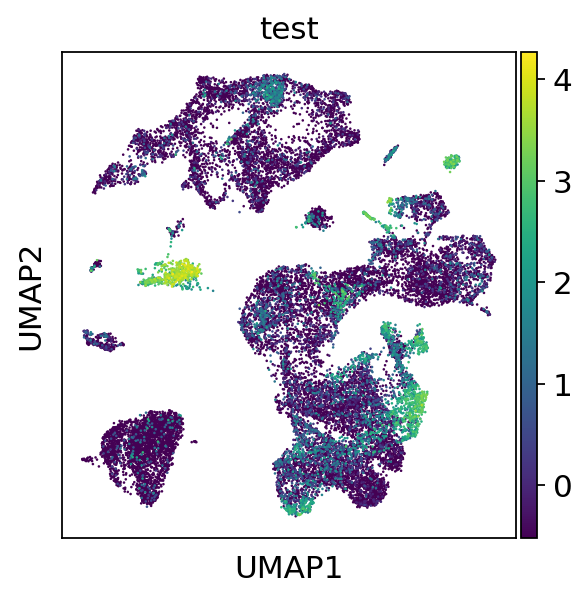

In [24]:
rna.obs['test'] = rna[:, 'GPC5'].X
sc.pl.umap(rna, color="test")

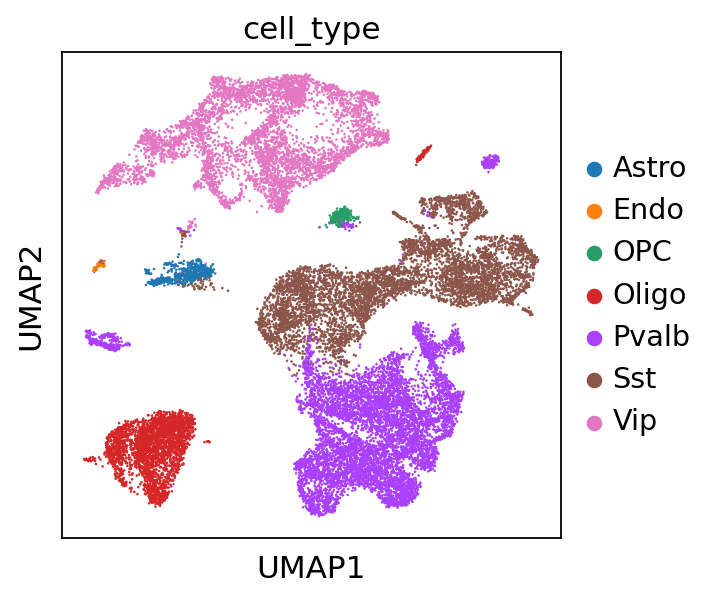

In [25]:
sc.pl.umap(rna, color="cell_type")

In [26]:
import collections
import pybedtools

from pybedtools.cbedtools import Interval
from scglue.check import check_deps
from scglue.genomics import Bed
from scglue.utils import smart_tqdm
from typing import Any, Callable, Mapping, Optional, Union

def interval_dist(x: Interval, y: Interval) -> int:
    r"""
    Compute distance and relative position between two bed intervals

    Parameters
    ----------
    x
        First interval
    y
        Second interval

    Returns
    -------
    dist
        Signed distance between ``x`` and ``y``
    """
    if x.chrom != y.chrom:
        return np.inf * (-1 if x.chrom < y.chrom else 1)

    _start1, _end1 = x.start, x.stop
    _start2, _end2 = y.start, y.stop
    
    d = _start1 - _start2
    if abs(d) < 10000:
        return 0
    return d

def window_graph(
        left: Union[Bed, str], right: Union[Bed, str], window_size: int,
        left_sorted: bool = False, right_sorted: bool = False,
        attr_fn: Optional[Callable[[Interval, Interval, float], Mapping[str, Any]]] = None
) -> nx.MultiDiGraph:
    r"""
    Construct a window graph between two sets of genomic features, where
    features pairs within a window size are connected.

    Parameters
    ----------
    left
        First feature set, either a :class:`Bed` object or path to a bed file
    right
        Second feature set, either a :class:`Bed` object or path to a bed file
    window_size
        Window size (in bp)
    left_sorted
        Whether ``left`` is already sorted
    right_sorted
        Whether ``right`` is already sorted
    attr_fn
        Function to compute edge attributes for connected features,
        should accept the following three positional arguments:

        - l: left interval
        - r: right interval
        - d: signed distance between the intervals

        By default no edge attribute is created.

    Returns
    -------
    graph
        Window graph
    """
    check_deps("bedtools")
    if isinstance(left, Bed):
        pbar_total = len(left)
        left = left.to_bedtool()
    else:
        pbar_total = None
        left = pybedtools.BedTool(left)
    if not left_sorted:
        left = left.sort(stream=True)
    left = iter(left)  # Resumable iterator
    if isinstance(right, Bed):
        right = right.to_bedtool()
    else:
        right = pybedtools.BedTool(right)
    if not right_sorted:
        right = right.sort(stream=True)
    right = iter(right)  # Resumable iterator

    attr_fn = attr_fn or (lambda l, r, d: {})
    if pbar_total is not None:
        left = smart_tqdm(left, total=pbar_total)
    graph = nx.MultiDiGraph()
    window = collections.OrderedDict()  # Used as ordered set
    for l in left:
        for r in list(window.keys()):  # Allow remove during iteration
            d = interval_dist(l, r)
            if -window_size <= d <= window_size:
                graph.add_edge(l.name, r.name, **attr_fn(l, r, d))
            elif d > window_size:
                del window[r]
            else:  # dist < -window_size
                break  # No need to expand window
        else:
            for r in right:  # Resume from last break
                d = interval_dist(l, r)
                if -window_size <= d <= window_size:
                    graph.add_edge(l.name, r.name, **attr_fn(l, r, d))
                elif d > window_size:
                    continue
                window[r] = None  # Placeholder
                if d < -window_size:
                    break
    pybedtools.cleanup()
    return graph

import itertools
import networkx as nx

rna_bed = scglue.genomics.Bed(rna.var.assign(name=rna.var_names))
hic_bed = scglue.genomics.Bed(hic.var.assign(name=hic.var_names))

def _dist_power_decay(x: int) -> float:
    return ((x + 10000) / 10000) ** (-0.75)
graph = window_graph(
    rna_bed, hic_bed, window_size=20000,
    attr_fn=lambda l, r, d, s=1: {
        "dist": abs(d), "weight": _dist_power_decay(abs(d)), "sign": s
    }
)

rgraph = graph.reverse()
nx.set_edge_attributes(graph, "fwd", name="type")
nx.set_edge_attributes(rgraph, "rev", name="type")
graph = scglue.graph.compose_multigraph(graph, rgraph)

hvg_reachable = scglue.graph.reachable_vertices(graph, rna.var.query("highly_variable").index)
hic.var["highly_variable"] = [
    item in hvg_reachable for item in hic.var_names
]

all_features = set(itertools.chain.from_iterable(
    map(lambda x: x.var_names, [rna, hic])
))
for item in all_features:
    graph.add_edge(item, item, weight=1.0, sign=1, type="loop")

  0%|          | 0/29175 [00:00<?, ?it/s]

In [27]:
# import itertools
# import networkx as nx

# rna_bed = scglue.genomics.Bed(rna.var.assign(name=rna.var_names))
# hic_bed = scglue.genomics.Bed(hic.var.assign(name=hic.var_names))

# # rna_bed = rna_bed.expand(2000, 0)

# def _dist_power_decay(x: int) -> float:
#     return ((x + 10000) / 10000) ** (-0.75)
# graph = scglue.genomics.window_graph(
#     rna_bed, hic_bed, window_size=20000,
#     attr_fn=lambda l, r, d, s=1: {
#         "dist": abs(d), "weight": _dist_power_decay(abs(d)), "sign": s
#     }
# )

# rgraph = graph.reverse()
# nx.set_edge_attributes(graph, "fwd", name="type")
# nx.set_edge_attributes(rgraph, "rev", name="type")
# graph = scglue.graph.compose_multigraph(graph, rgraph)

# hvg_reachable = scglue.graph.reachable_vertices(graph, rna.var.query("highly_variable").index)
# hic.var["highly_variable"] = [
#     item in hvg_reachable for item in hic.var_names
# ]

# all_features = set(itertools.chain.from_iterable(
#     map(lambda x: x.var_names, [rna, hic])
# ))
# for item in all_features:
#     graph.add_edge(item, item, weight=1.0, sign=1, type="loop")

In [28]:
# def _dist_power_decay(x: int) -> float:
#     return ((x + 10000) / 10000) ** (-0.75)

# graph = scglue.genomics.rna_anchored_prior_graph(rna, hic, extend_range=10000, extend_fn=_dist_power_decay)
# graph

In [29]:
# test_hic = hic[:,hic.var['highly_variable']==True]
# test_hic

In [30]:
# sc.pp.highly_variable_genes(test_hic, n_top_genes=2000, flavor="seurat_v3")
# sc.pp.normalize_total(test_hic)
# sc.pp.log1p(test_hic)
# sc.pp.scale(test_hic)
# sc.tl.pca(test_hic, n_comps=100, svd_solver="auto")

In [31]:
# sc.pp.neighbors(test_hic, metric="cosine")
# sc.tl.umap(test_hic)
# sc.pl.umap(test_hic, color="cell_type")

In [32]:
graph.number_of_nodes(), graph.number_of_edges()

(338756, 572158)

In [33]:
all(graph.has_node(gene) for gene in rna.var_names), \
all(graph.has_node(peak) for peak in hic.var_names), \
all(graph.has_edge(gene, gene) for gene in rna.var_names), \
all(graph.has_edge(peak, peak) for peak in hic.var_names), \
all(graph.has_edge(j, i) for i, j, _ in graph.edges)

(True, True, True, True, True)

In [34]:
hic.var.head()

,chrom,chromStart,chromEnd,highly_variable
chr1_0,chr1,0,10000,False
chr1_10000,chr1,10000,20000,False
chr1_20000,chr1,20000,30000,False
chr1_30000,chr1,30000,40000,False
chr1_40000,chr1,40000,50000,False


In [35]:
# rna.write("/home/micl/workspace/lmh_data/sclab/rna_preprocessed.h5ad", compression="gzip")
# hic.write("/home/micl/workspace/lmh_data/sclab/hic_preprocessed.h5ad", compression="gzip")
# nx.write_graphml(graph, "/home/micl/workspace/lmh_data/sclab/prior.graphml.gz")

In [36]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 1 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 1319
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.549, 'g_kl': 0.133, 'g_elbo': 0.682, 'x_rna_nll': 1.766, 'x_rna_kl': 0.051, 'x_rna_elbo': 1.817, 'x_hic_nll': 2.838, 'x_hic_kl': 0.01, 'x_hic_elbo': 2.847, 'dsc_loss': 0.529, 'vae_loss': 4.692, 'gen_loss': 4.666}, val={'g_nll': 0.551, 'g_kl': 0.132, 'g_elbo': 0.683, 'x_rna_nll': 1.746, 'x_rna_kl': 0.051, 'x_rna_elbo': 1.797, 'x_hic_nll': 2.836, 'x_hic_kl': 0.009, 'x_hic_elbo': 2.845, 'dsc_loss': 0.514, 'vae_loss': 4.668, 'gen_loss': 4.643}, 6.1s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.535, 'g_kl': 0.113, 'g_elbo': 0.648, 'x_rna_nll': 1.735, 'x_rna_kl': 0.057, '

2022-07-14 01:34:19,276 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "41"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (32, 14)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 1319
[INFO] SCGLUEModel: Setting `align_burnin` = 23
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.508, 'g_kl': 0.095, 'g_elbo': 0.603, 'x_rna_nll': 1.73, 'x_rna_kl': 0.057, 'x_rna_elbo': 1.787, 'x_hic_nll': 2.828, 'x_hic_kl': 0.005, 'x_hic_elbo': 2.834, 'dsc_loss': 0.65, 'vae_loss': 4.645, 'gen_loss': 4.612}, val={'g_nll': 0.509, 'g_kl': 0.094

2022-07-14 01:41:10,334 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "66"...


In [37]:
# dx = scglue.models.integration_consistency(
#     glue, {"rna": rna, "hic": hic}, graph,
#     count_layers={"rna": "counts"}
# )
# dx

In [38]:
# import seaborn as sns
# _ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [39]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

In [ ]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

In [ ]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined, n_components=3)
# sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, dimensions=[(0, 1), (1, 2)])
combined

In [ ]:
combined.obsm['X_umap']

In [ ]:
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

In [ ]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')